## Uniswap trade classifier

The objective of this notebook is to create an algorithm that is able to classify uniswap trades between convenience and arbritrage trades based on the precision of the amount of coin sold.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_pickle('uniswap_events.pickle')

In [3]:
len(df)

147439

In [4]:
def classifier(df, c_rule):
    result = {'Conv': 0,
          'Arb': 0,
          'None': 0}
    for i in range(len(df)):
        if df.loc[i, 'event'] == 'EthPurchase' or df.loc[i, 'event'] == 'TokenPurchase':
            if (df.loc[i, 'token_delta'] / (10 ** (18-c_rule))).is_integer() or (df.loc[i, 'eth_delta'] / (10 ** (18-c_rule))).is_integer():
              result['Conv'] += 1
            else:
              result['Arb'] += 1
        else:
            result['None'] +=1
    return result

We will create a list of c_rule values going from 0 to 18 (minimum ETH denomination is 1 WEI, which is equivalent to 1E10-18 ETH). Afterwards, the classifier function will be applied on the whole uniswap trade history dataframe.

In [5]:
c_rule = list(range(0,19))
res = list()
for i in c_rule:
        res.append(classifier(df, i))

In [6]:
res

[{'Conv': 34751, 'Arb': 100858, 'None': 11830},
 {'Conv': 40955, 'Arb': 94654, 'None': 11830},
 {'Conv': 47686, 'Arb': 87923, 'None': 11830},
 {'Conv': 51897, 'Arb': 83712, 'None': 11830},
 {'Conv': 56827, 'Arb': 78782, 'None': 11830},
 {'Conv': 58419, 'Arb': 77190, 'None': 11830},
 {'Conv': 60217, 'Arb': 75392, 'None': 11830},
 {'Conv': 61112, 'Arb': 74497, 'None': 11830},
 {'Conv': 62117, 'Arb': 73492, 'None': 11830},
 {'Conv': 62610, 'Arb': 72999, 'None': 11830},
 {'Conv': 63287, 'Arb': 72322, 'None': 11830},
 {'Conv': 65598, 'Arb': 70011, 'None': 11830},
 {'Conv': 75591, 'Arb': 60018, 'None': 11830},
 {'Conv': 106266, 'Arb': 29343, 'None': 11830},
 {'Conv': 125351, 'Arb': 10258, 'None': 11830},
 {'Conv': 130620, 'Arb': 4989, 'None': 11830},
 {'Conv': 133163, 'Arb': 2446, 'None': 11830},
 {'Conv': 134349, 'Arb': 1260, 'None': 11830},
 {'Conv': 135609, 'Arb': 0, 'None': 11830}]

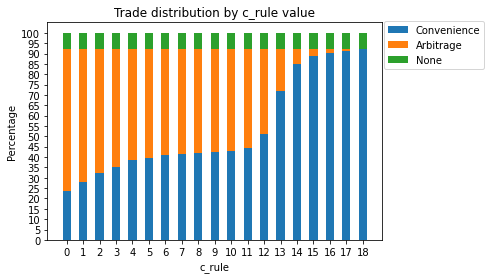

In [7]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']

conv = [res[i]['Conv'] / len(df) * 100 for i in range(0,19)]
arb = [res[i]['Arb'] / len(df) * 100  for i in range(0,19)]
none = [res[i]['None'] / len(df) * 100  for i in range(0,19)]
x = np.arange(len(labels))
width = 0.5


arb_bottom = conv
none_bottom = [conv[i]+arb[i] for i in range(len(conv))]
p1 = plt.bar(x, conv, width)
p2 = plt.bar(x, arb, width, bottom=arb_bottom)
p3 = plt.bar(x, none, width, bottom=none_bottom)

plt.ylabel('Percentage')
plt.xlabel('c_rule')
plt.title('Trade distribution by c_rule value')
plt.legend((p1[0], p2[0], p3[0]), ('Convenience', 'Arbitrage', 'None'), bbox_to_anchor=(0.67,0.65,0.65,0.38))
plt.xticks(x, labels)
plt.yticks(np.arange(0, 105, 5))

plt.show()

As shown in the plot, the convenience percentage increases as the c_rule parameter is also increased. By looking at the classifier function, it becomes clear that this behavior is coherent, because as said before, the c_rule defines how precise a convenience trade usually is. Thus, the number of trades that are precise enough to be considered an arbitrage trade for high c_rule values is severely low.